# OBJECTIF

L'objectif de ce TP est de montrer que, pour différentes lois de probabilité et différentes méthodes déscente de gradient, l'espérance d'un vecteur aléaroire se dévoile comme la solution d'un problème d'optimisation, et à comparer empiriquement les convergences de nos modèles. 

# DEMONSTRATION

Soit $X=(X_1,\dots,X_d)$ un vecteur aléatoire à valeurs dans $\mathbb{R}^d$.
On considère la fonction objectif
$$
f(x_1,\dots,x_d)
= \mathbb{E}\big[(X_1-x_1)^2+\cdots+(X_d-x_d)^2\big].
$$

Pour une réalisation de $X$, un gradient bruité de $f$ en $(x_1,\dots,x_d)$ est donné par :
$$
\big(-2(X_1-x_1),\dots,-2(X_d-x_d)\big).
$$

On a donc, en prenant l'espérance :
$$
\nabla f(x_1,\dots,x_d)
= \mathbb{E}\big[(-2(X_1-x_1),\dots,-2(X_d-x_d))\big].
$$
D'où
$$
\nabla f(x_1,\dots,x_d)
= -2\big(\mathbb{E}[X_1]-x_1,\dots,\mathbb{E}[X_d]-x_d\big).
$$

En posant $x\in\mathbb{R}^d$ avec $x=(x_1,\dots,x_d)$, on peut écrire :
$$
\nabla f(x)=2\big(x-\mathbb{E}[X]\big).
$$

Pour trouver un minimum de $f$, on résout :
$$
\nabla f(x)=0
\quad \Longleftrightarrow \quad
2\big(x-\mathbb{E}[X]\big)=0
\quad \Longleftrightarrow \quad
x=\mathbb{E}[X].
$$
Ainsi, $\mathbb{E}[X]$ est un point critique de $f$.

De plus, la Hessienne de $f$ vaut :
$$
\nabla^2 f(x)=2I_d,
$$
où $I_d$ est la matrice identité en dimension $d$.
Comme $2I_d$ est définie positive, $f$ est strictement convexe sur $\mathbb{R}^d$.
Le point critique est donc un minimum global unique.

Finalement, le minimiseur de
$$
f(x)=\mathbb{E}\big[(X_1-x_1)^2+\cdots+(X_d-x_d)^2\big]
$$
est exactement
$$
\boxed{x^\star=\mathbb{E}[X]}.
$$


### *Représentation du gradiant de la fonction pour analyser les conditions de Robbins-Monro* 

- Dans le contexte d'une loi normale homoscélastique et en dimension 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

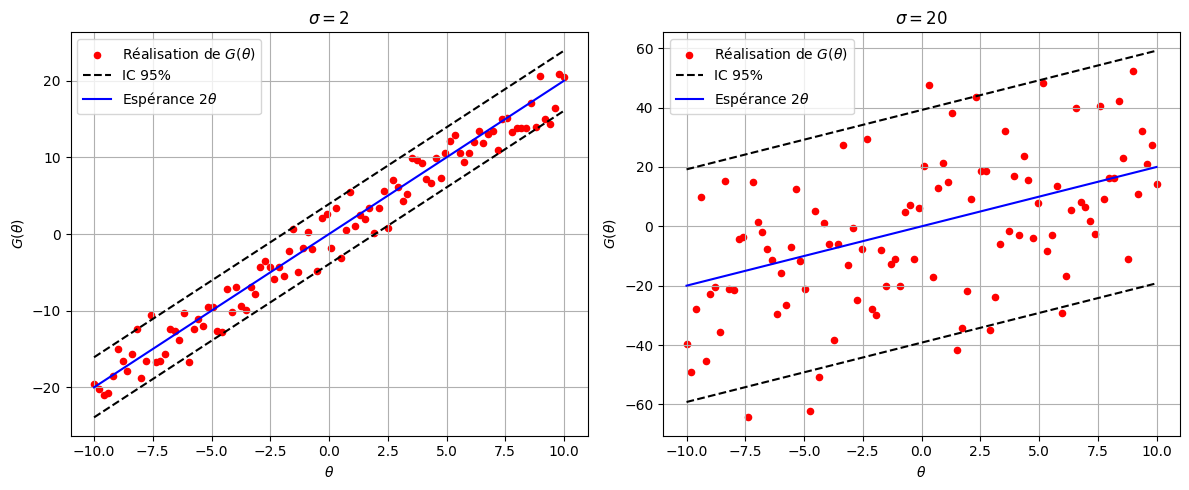

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def G(theta, sigma):
    return 2 * theta + np.random.normal(0, sigma)

Theta = np.linspace(-10, 10, 100)

sigmas = [2, 20]  # sigma petit et sigma grand
titles = [r'$\sigma = 2$', r'$\sigma = 20$']

plt.figure(figsize=(12, 5))

for i, sigma in enumerate(sigmas):
    Y = np.array([G(t, sigma) for t in Theta])

    borne_inf = 2 * Theta - 1.96 * sigma
    borne_sup = 2 * Theta + 1.96 * sigma

    plt.subplot(1, 2, i + 1)

    plt.scatter(Theta, Y, color='red', s=20, label='Réalisation de $G(\\theta)$')
    plt.plot(Theta, borne_inf, 'k--', label='IC 95%')
    plt.plot(Theta, borne_sup, 'k--')
    plt.plot(Theta, 2 * Theta, color='blue', label='Espérance $2\\theta$')

    plt.title(titles[i])
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$G(\theta)$')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


Pour coller aux conditions de Gibbs-Monro, il faut bounded mean and variance. pour la mean c'est ok même si la fonction n'est pas borné on va se mettre dans un espace de recherche borné. 2ème condition on est bien dans le cas :  g(.) below then above threshold 0. g(.) strictly increasing near θ⋆ = E[X]. et ici  |g(θ)−α| not too small far from θ⋆ est très bien respecté.

Sur les 2 graphes représenté ont voit que plus sigma augmente plus la recherche devient compliqué et on pourrait avoir du ping pong. 
Avant de tester différents algorithmes et avec cette analyse. 



La comparaison de la performance se fait avec la moyenne empirique de votre échantillon par rapport à la solution trouvé. peut on pensé à d'autres estimteurs de la moyenne ? 

In [ ]:
def RobbinsMonro(thetainit, a, alpha, nmax=50):
    Theta = np.zeros(nmax)
    Theta[0] = thetainit
    for n in range(nmax - 1):
        Theta[n + 1] = Theta[n] - a / (n + 1)**alpha * G(Theta[n])
    return Theta

In [ ]:

# constantes pour tracés et essais
mu = 1             # valeur cible
thetainit = 2      # valeur de départ de la suite

Theta1 = RobbinsMonro(thetainit, 0.1, alpha=1)
Theta2 = RobbinsMonro(thetainit, 0.25, alpha=1)
Theta3 = RobbinsMonro(thetainit, 0.5, alpha=1)
Theta4 = RobbinsMonro(thetainit, 1, alpha=1)
Theta5 = RobbinsMonro(thetainit, 2, alpha=1)

range_y = [-2, 4]  # zone de tracé des ordonnées
#ax = plt.gca()
#ax.set_ylim(range_y)

plt.plot(Theta1, color='blue', label='Theta1 (0.1)')
plt.plot(Theta2, color='purple', label='Theta2 (0.25)')
plt.plot(Theta3, color='red', label='Theta3 (0.5)')
plt.plot(Theta4, color='brown', label='Theta4 (1)')
plt.plot(Theta5, color='black', label='Theta5 (2)')
plt.axhline(mu, color='gray')
plt.ylim(range_y)
plt.show()

# les séries semblent se rapprocher peu à peu de la cible
# pour a=0.5 (en rouge), avec seed=123456, la convergence semble plus rapide
# cela peut s'expliquer en théorie (cf. cours)
# mais d'autres seeds conduisent à des résultats visuels différents
# il faut bien imaginer dans une situation pratique l'impact du choix de a...

In [ ]:
Theta1 = RobbinsMonro(thetainit, 0.1, alpha=0)
Theta2 = RobbinsMonro(thetainit, 0.25, alpha=0)
Theta3 = RobbinsMonro(thetainit, 0.5, alpha=0)
Theta4 = RobbinsMonro(thetainit, 1, alpha=0)
Theta5 = RobbinsMonro(thetainit, 2, alpha=0)

plt.plot(Theta1, color='blue', label='Theta1 (0.1)')
plt.plot(Theta2, color='purple', label='Theta2 (0.25)')
plt.plot(Theta3, color='red', label='Theta3 (0.5)')
plt.plot(Theta4, color='brown', label='Theta4 (1)')
plt.plot(Theta5, color='black', label='Theta5 (2)')
plt.axhline(mu, color='gray')

plt.legend()
plt.show()
# on observe bien une oscillation autour de la bonne valeur. En effet, avec des pas constants, le bruit n'est jamais réduit, il demeure à chaque itération.

In [ ]:
# Remind arguments: RobbinsMonro <- function(thetainit, a, alpha=1, nmax=50) 
# Try over nsimu iterations, and collect the last proposal at each iteration
# we plot here only bias for instance

def SeveralRobbinsMonro(thetainit, a, alpha=1, nmax=50, nsimu=100):
    Result = np.zeros(nsimu)
    for i in range(nsimu):
        Theta = RobbinsMonro(thetainit, a, alpha, nmax)
        Result[i] = Theta[-1]  # last value of the vector
    return Result

def RobbinsMonroForVaryingStepSize(thetainit, Steps, alpha=1, nmax=50, nsimu=100):
    nbSteps = len(Steps)
    trueTarget = mu
    Bias = np.zeros(nbSteps)
    Variance = np.zeros(nbSteps)
    for i in range(nbSteps):
        Resu = SeveralRobbinsMonro(thetainit, Steps[i], alpha, nmax, nsimu) 
        Bias[i] = (np.mean(Resu) - trueTarget) ** 2
        Variance[i] = np.var(Resu)
    return Bias, Variance

Steps = np.linspace(0.01, 4, 100)
Bias, Variance = RobbinsMonroForVaryingStepSize(thetainit=2, Steps=Steps, alpha=1, nmax=50, nsimu=500)
MSE = Bias + Variance 
plt.plot(Steps, Bias, color='blue', label='Bias', linestyle='-')
plt.plot(Steps, MSE , color='red', label='MSE', linestyle='-')
plt.plot(Steps, Variance , color='green', label='MSE', linestyle='-')
plt.yscale('log')
plt.xlabel('Step Size')
plt.ylabel('Bias')
plt.legend()
plt.show()

# A compléter avec compromis biais variance, notamment si alpha varie
# donne une idée d'un pas adapté pour nmax pas (différent pas optimal asymptotique)
# difficile de conclure dans la zone très erratiques, requiert plus d'essais